# Here we try to FT openAI model for text2Signal use -case
examples taken from:

https://github.com/samlhuillier/viggo-finetune/blob/main/openai/openai_dataset_analytics.ipynb

In [1]:
from dotenv import load_dotenv
from pathlib import Path  # Python 3.6+ only
import sys
import os
sys.path.append("./")
env_path = Path('..') / '.env'
load_dotenv(dotenv_path=env_path)

True

## I.  Azure Open Ai new API basic usage

In [2]:
! pip install openai --upgrade


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
os.getenv("AZURE_OPENAI_KEY")

In [92]:
#! pip install openai --upgrade
#! pip install tiktoken
#from openai import OpenAI
import os
from openai import AzureOpenAI

# Old
#AZURE_OPENAI_API_KEY=d079f278137e44a8812fc39fe85449eb
#AZURE_OPENAI_ENDPOINT=https://coe-openai-instance.openai.azure.com/
#azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
#api_key=os.getenv("AZURE_OPENAI_KEY") # None
#api_key=os.getenv("AZURE_OPENAI_API_KEY")
#model="coe-gpt-35-turbo"

# New
azure_endpoint=os.getenv("AZURE_OPENAI_FT_ENDPOINT")
api_key="d9c6245af9a84ab0947049863a6a31a4" # os.getenv("AZURE_OPENAI_API_FT_KEY")
model="test-gpt-35"
model="gpt-35-turbo-0613-text2signal"

client = AzureOpenAI(
  azure_endpoint = azure_endpoint, 
  api_key=api_key,  
  api_version="2023-12-01-preview"  # This API version or later is required to access fine-tuning for turbo/babbage-002/davinci-002
)

messages=[
        {
            "role": "user",
            "content": "How do I output all files in a directory using Python?",
        }, ]


a = {"messages": [{"role": "system", 
                   "content": "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."}, 
                  {"role": "user", "content": "Retrieve distinct event names, count of event names, and sort them in descending order based on the count of event names, and limit the result to 10 rows from the 'defaultview-59' table. "}, 
                  #{"role": "assistant", "content": "SELECT DISTINCT  event_name,\"Event Created by User Type\",count(event_name) AS A\nFROM FLATTEN (\"defaultview-59\")\nORDER BY 3  desc\nlimit 10"}
                  ]}

#messages=a["messages"]
#n=999
#messages, answer =dataset_test[n]["messages"][0:2], dataset_test[n]["messages"][2]['content']


completion = client.chat.completions.create(
    model=model,  # e.g. gpt-35-instant
    messages=messages
)
#print(completion.model_dump_json(indent=2)["choices"], answer)
print(json.loads(completion.model_dump_json(indent=2))["choices"][0]["message"]["content"]) #, "\n : GT \n") #, answer)

You can use the `os.listdir()` function to list all files and folders in a directory. Here's an example:

```python
import os

# Replace 'path_to_directory' with the actual path
directory = os.path.join('path_to_directory')

# List all entries in the directory
files = os.listdir(directory)

# Output all filenames
for file in files:
    print(file)
```

This will print the names of all files and folders present in the given directory.


In [93]:
json.loads(completion.model_dump_json(indent=2))["choices"][0]["message"]["content"]

"You can use the `os.listdir()` function to list all files and folders in a directory. Here's an example:\n\n```python\nimport os\n\n# Replace 'path_to_directory' with the actual path\ndirectory = os.path.join('path_to_directory')\n\n# List all entries in the directory\nfiles = os.listdir(directory)\n\n# Output all filenames\nfor file in files:\n    print(file)\n```\n\nThis will print the names of all files and folders present in the given directory."

In [3]:
#prompt_oai=single_string+queryoai+queryjson
#prompt=[prompt_oai,prompt_oai,prompt_oai,prompt_oai,prompt_oai]
#prompt=[prompt_oai]

#start = time.time()
max_tokens=620
stop=["]]"]
#stop=["}\n]"]

engine="coe-text-davinci-003"
#engine="coe-gpt-35-turbo"
prompt=["Say few words about yourself"]

response = client.completions.create(
  model=engine,
  prompt=prompt,
  temperature=0,
  max_tokens=max_tokens,
  top_p=0.5,
  frequency_penalty=0,
  presence_penalty=0)
  #stop=stop) #stop=["<|im_sep|>","}\n]"])
response

Completion(id='cmpl-8pBoMsF3iFgufXwdGY5CV1ThYG1ex', choices=[CompletionChoice(finish_reason='stop', index=0, logprobs=None, text="\n\nI'm a hardworking, creative, and passionate individual who loves to learn and take on new challenges. I'm always looking for ways to improve and grow, and I'm excited to see what the future holds.")], created=1707210822, model='text-davinci-003', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=45, prompt_tokens=5, total_tokens=50))

# II. read and prepare data for FT with openAI


```py
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, 
              {"role": "user", "content": "What's the capital of France?"}, 
              {"role": "assistant", "content": "Paris, as if everyone doesn't know that already."}]}
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, 
              {"role": "user", "content": "Who wrote 'Romeo and Juliet'?"}, 
              {"role": "assistant", "content": "Oh, just some guy named William Shakespeare. Ever heard of him?"}]}
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, 
              {"role": "user", "content": "How far is the Moon from Earth?"}, 
              {"role": "assistant", "content": "Around 384,400 kilometers. Give or take a few, like that really matters."}]}
```
### Prompt use in code-llama FT experiments:

```yaml
query_template: >
<s>[INST]
You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. 
SIGNAL stands for Signavio Analytics Language. 
SIGNAL is a dialect of SQL.
Your goal is to help users craft SIGNAL 
queries and understand the SIGNAL language better. 
### Instruction:
Task to solve:
Construct SIGNAL expression querying given textual description in Input.
Expected output results are in JSON format.
### Input:
{description_llm}
### Output:
[/INST]
response_template: >
{{ "query":"""{query}"""}}</s>

```


In [398]:
import json

file_path='text2signal_train_5715.jsonl'
#file_path='text2signal_train_5715_openai.jsonl'
#file_path="text2signal_test_1000.jsonl"
dataset_in = []
with open(file_path) as f:
    for line in f:
        dataset_in.append(json.loads(line))
dataset_in[10]#['filename']

{'filename': 'f175961f19',
 'split': 'train',
 'name': 'Total Spend Over Time by PO Item Type',
 'query': 'SELECT \nDATE_TRUNC(\'QUARTER\', (SELECT LAST (END_TIME))) AS "Quarter",\nSUM ("PO Item Total Amount") AS "PO Item Total Amount", \n"PO Item Line Type"\nFROM "defaultview-431"\nGROUP BY 1,3\nORDER BY 1 ASC NULLS FIRST\nFILL timeseries(\'QUARTER\')\nLIMIT 500',
 'llm_name': 'signal_description_llama2-70b-chat-hf',
 'description_llm': "Retrieve the sum of 'PO Item Total Amount' for each quarter, grouped by 'PO Item Line Type', and displayed in ascending order. The data is taken from the 'defaultview-431' table, and the quarter is truncated from the last 'END_TIME' column value. The results are limited to 500 rows and filled with timeseries data."}

In [395]:
system_message="""You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. 
SIGNAL stands for Signavio Analytics Language. 
SIGNAL is a dialect of SQL.
Your goal is to help users craft SIGNAL queries and understand the SIGNAL language better."""

template={"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, 
              {"role": "user", "content": "What's the capital of France?"}, 
              {"role": "assistant", "content": "Paris, as if everyone doesn't know that already."}]}

# https://platform.openai.com/docs/guides/fine-tuning/example-format
system_message_completion="""You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. 
SIGNAL stands for Signavio Analytics Language. 
SIGNAL is a dialect of SQL.
Your goal is to help users craft SIGNAL queries and understand the SIGNAL language better.

  ### Instruction:
  
  Task to solve:
  
  Construct SIGNAL expression querying given textual description in Input.
  Expected output results are in JSON format.
"""
template_completion={"prompt": "<prompt text>", "completion": "<ideal generated text>"}

#{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
#{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
#{"prompt": "<prompt text>", "completion": "<ideal generated text>"}

system_message

"You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."

In [399]:
dataset=[]
dataset_completion=[]
for el in dataset_in: #[:3]:
    query={"messages": [{"role": "system", "content":  f'{system_message}'}, 
              {"role": "user", "content": f'{el["description_llm"]}'}, 
              {"role": "assistant", "content":  f'{el["query"]}'}]}
    query_completion={"prompt": f'{system_message_completion}\n   ### Input:\n\n   {el["description_llm"]} \n\n   ### Output:\n  ', 
                      "completion": f'{{ "query":"""{el["query"]}"""}}'}
    #print(query)
    dataset.append(query)
    dataset_completion.append(query_completion)

len(dataset), dataset[10],dataset_completion[10]
print(dataset[10])
print(dataset_completion[10])
print(dataset_completion[10]['prompt'])
print(dataset_completion[10]['completion'])

{'messages': [{'role': 'system', 'content': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."}, {'role': 'user', 'content': "Retrieve the sum of 'PO Item Total Amount' for each quarter, grouped by 'PO Item Line Type', and displayed in ascending order. The data is taken from the 'defaultview-431' table, and the quarter is truncated from the last 'END_TIME' column value. The results are limited to 500 rows and filled with timeseries data."}, {'role': 'assistant', 'content': 'SELECT \nDATE_TRUNC(\'QUARTER\', (SELECT LAST (END_TIME))) AS "Quarter",\nSUM ("PO Item Total Amount") AS "PO Item Total Amount", \n"PO Item Line Type"\nFROM "defaultview-431"\nGROUP BY 1,3\nORDER BY 1 ASC NULLS FIRST\nFILL timeseries(\'QUARTER\')\nLIMIT 500'}]}
{'prompt': "You are SIGNAL assistant, a part of SAP Signa

In [4]:
# if openai.jsonl was read
dataset=dataset_in 

In [5]:
from collections import defaultdict
# Format error checks
format_errors = defaultdict(int)


for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue

    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name") for k in message):
            format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant"):
            format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        if not content or not isinstance(content, str):
            format_errors["missing_content"] += 1

    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")


No errors found


In [6]:
import tiktoken
import numpy as np
# Token counting functions
encoding = tiktoken.get_encoding("cl100k_base")

# not exact!
# simplified from https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3
    return num_tokens

def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

def print_distribution(values, name):
    print(f"\n#### Distribution of {name}:")
    print(f"min / max: {min(values)}, {max(values)}")
    print(f"mean / median: {np.mean(values)}, {np.median(values)}")
    print(f"p5 / p95: {np.quantile(values, 0.1)}, {np.quantile(values, 0.9)}")

In [7]:
# Warnings and tokens counts
n_missing_system = 0
n_missing_user = 0
n_messages = []
convo_lens = []
assistant_message_lens = []

for ex in dataset:
    messages = ex["messages"]
    if not any(message["role"] == "system" for message in messages):
        n_missing_system += 1
    if not any(message["role"] == "user" for message in messages):
        n_missing_user += 1
    n_messages.append(len(messages))
    convo_lens.append(num_tokens_from_messages(messages))
    assistant_message_lens.append(num_assistant_tokens_from_messages(messages))

print("Num examples missing system message:", n_missing_system)
print("Num examples missing user message:", n_missing_user)
print_distribution(n_messages, "num_messages_per_example")
print_distribution(convo_lens, "num_total_tokens_per_example")
print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
n_too_long = sum(l > 4096 for l in convo_lens)
print(f"\n{n_too_long} examples may be over the 4096 token limit, they will be truncated during fine-tuning")

Num examples missing system message: 0
Num examples missing user message: 0

#### Distribution of num_messages_per_example:
min / max: 3, 3
mean / median: 3.0, 3.0
p5 / p95: 3.0, 3.0

#### Distribution of num_total_tokens_per_example:
min / max: 94, 2156
mean / median: 255.51321084864392, 218.0
p5 / p95: 132.0, 386.0

#### Distribution of num_assistant_tokens_per_example:
min / max: 12, 1292
mean / median: 94.33508311461067, 67.0
p5 / p95: 26.0, 162.0

0 examples may be over the 4096 token limit, they will be truncated during fine-tuning


In [8]:
def num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613"):
    """Return the number of tokens used by a list of messages.
    
    
    """
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        print("Warning: model not found. Using cl100k_base encoding.")
        encoding = tiktoken.get_encoding("cl100k_base")
    if model in {
        "gpt-3.5-turbo-1106",
        "gpt-4-0613",
        "gpt-3.5-turbo-0613",
        "gpt-3.5-turbo-16k-0613",
        "gpt-4-0314",
        "gpt-4-32k-0314",
        "gpt-4-32k-0613",
        }:
        tokens_per_message = 3
        tokens_per_name = 1
    elif model == "gpt-3.5-turbo-0301":
        tokens_per_message = 4  # every message follows <|start|>{role/name}\n{content}<|end|>\n
        tokens_per_name = -1  # if there's a name, the role is omitted
    elif "gpt-3.5-turbo" in model:
        print("Warning: gpt-3.5-turbo may update over time. Returning num tokens assuming gpt-3.5-turbo-0613.")
        return num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613")
    elif "gpt-4" in model:
        print("Warning: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.")
        return num_tokens_from_messages(messages, model="gpt-4-0613")
    else:
        raise NotImplementedError(
            f"""num_tokens_from_messages() is not implemented for model {model}. See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens."""
        )
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>
    return num_tokens

In [9]:
# combine all tokens from dataset  
q=[]
#[ el['messages'] for 
for el in dataset:
    q+=el['messages']
len(q)

17145

In [10]:
example_messages=q
print("Number of tokens:",sum(convo_lens))
example_messages1 = [
    {
        "role": "system",
        "content": "You are a helpful, pattern-following assistant that translates corporate jargon into plain English.",
    },
    {
        "role": "system",
        "name": "example_user",
        "content": "New synergies will help drive top-line growth.",
    },
    {
        "role": "system",
        "name": "example_assistant",
        "content": "Things working well together will increase revenue.",
    },
    {
        "role": "system",
        "name": "example_user",
        "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage.",
    },
    {
        "role": "system",
        "name": "example_assistant",
        "content": "Let's talk later when we're less busy about how to do better.",
    },
    {
        "role": "user",
        "content": "This late pivot means we don't have time to boil the ocean for the client deliverable.",
    },
]
# gpt-3.5-turbo	$0.0080 / 1K tokens
Nepoch=10
pr = 0.0080 /1024
for model in [
     "gpt-3.5-turbo-1106",
    "gpt-3.5-turbo-0301",
    "gpt-3.5-turbo-0613",
    "gpt-3.5-turbo",
    "gpt-4-0314",
    "gpt-4-0613",
    "gpt-4",
    ]:
    print(model)
    # example token count from the function defined above
    nt=num_tokens_from_messages(example_messages, model)
    print(f"{nt} prompt tokens counted by num_tokens_from_messages(). For {Nepoch} Epochs:  {nt*pr*Nepoch}$")
    # example token count from the OpenAI API
    ### response = openai.ChatCompletion.create(
    ###     model=model,
    ###     messages=example_messages,
    ###     temperature=0,
    ###     max_tokens=1,  # we're only counting input tokens here, so let's not waste tokens on the output
    ### )
    ### print(f'{response["usage"]["prompt_tokens"]} prompt tokens counted by the OpenAI API.')
    ### print()

Number of tokens: 1460258
gpt-3.5-turbo-1106
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$
gpt-3.5-turbo-0301
1460261 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  114.082890625$
gpt-3.5-turbo-0613
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$
gpt-3.5-turbo
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$
gpt-4-0314
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$
gpt-4-0613
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$
gpt-4
1443116 prompt tokens counted by num_tokens_from_messages(). For 10 Epochs:  112.7434375$


In [400]:
## Save JSONL in openAI format
data_set_to_save=dataset_completion
file_path="text2signal_test_1000_openai_completion.jsonl"
file_path="text2signal_train_5715_openai_completion.jsonl"
#file_path='text2signal_train_5715_openai.jsonl'
with open(file_path, 'w') as outfile:
    for entry in data_set_to_save:
        json.dump(entry, outfile)
        outfile.write('\n')

In [401]:
len(data_set_to_save)

5715

# III. Fine tuning on Azure open AI 

In [39]:

from dotenv import load_dotenv
from pathlib import Path  # Python 3.6+ only
import sys
import os
sys.path.append("./")
env_path = Path('..') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [176]:
#! pip install openai --upgrade
#from openai import OpenAI
import os
from openai import AzureOpenAI

# gets the API Key from environment variable AZURE_OPENAI_API_KEY
#client = AzureOpenAI(
#    api_version="2023-12-01-preview",
#    # https://learn.microsoft.com/en-us/azure/ai-services/openai/reference#rest-api-versioning
#    # https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
#    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
#    api_key = os.getenv("AZURE_OPENAI_KEY"),  
#)
azure_endpoint=os.getenv("AZURE_OPENAI_FT_ENDPOINT")
api_key="d9c6245af9a84ab0947049863a6a31a4" # os.getenv("AZURE_OPENAI_API_FT_KEY")
model="test-gpt-35"
model="gpt-35-turbo-0613-text2signal"

client = AzureOpenAI(
  azure_endpoint = azure_endpoint, #os.getenv("AZURE_OPENAI_ENDPOINT"), 
  api_key=api_key, #os.getenv("AZURE_OPENAI_KEY"),  
  api_version="2023-12-01-preview"  # This API version or later is required to access fine-tuning for turbo/babbage-002/davinci-002
)

### client = AzureOpenAI(
###     api_key=os.getenv("AZURE_OPENAI_KEY"),  
###     api_version="2023-12-01-preview",
###     azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
### )

### client = OpenAI(
###   api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
###   #api_type = "azure",
###   #api_version = "2023-05-15",
###   #api_base = "https://coe-openai-instance.openai.azure.com/"
### )
print(client._api_version)

2023-12-01-preview


In [19]:
azure_endpoint

'https://coe-openai-ft.openai.azure.com/'

In [177]:
# file operations LIST already available files
client.files.list()

SyncPage[FileObject](data=[FileObject(id='file-548424ab1408488aaac1c06f80c52cbe', bytes=4975, created_at=1707382454, filename='xbox_test_FT.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 903, 'examples': 10}, updated_at=1707382459), FileObject(id='file-38ffe93cf0974289901ddf06a467cbcf', bytes=1097, created_at=1707384377, filename='results.csv', object='file', purpose='fine-tune-results', status='processed', status_details=None, statistics={'tokens': 0, 'examples': 0}, updated_at=1707384848), FileObject(id='file-5b99575dca7143bd91d4bd345df8d798', bytes=6597552, created_at=1707390730, filename='text2signal_train_5715_openai.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 1460258, 'examples': 5715}, updated_at=1707390740), FileObject(id='file-3a7ef624ad33430b8686d094fe5cf4d4', bytes=956660, created_at=1707390731, filename='text2signal_test_1000_openai.jsonl', object='file

In [402]:
# file operations
from pathlib import Path
client.files.list()
#client.files.delete("file-1db078219e3c46d089a4a41d42abff22")
#client.files.delete('file-6eb32d71a9b540899aa71e487f507f0f')
validation_file_name="text2signal_test_1000_openai.jsonl"
training_file_name='text2signal_train_5715_openai.jsonl'

validation_file_name="text2signal_test_1000_openai_completion.jsonl"
training_file_name="text2signal_train_5715_openai_completion.jsonl"

client.files.create(
    file=Path(training_file_name),
    purpose="fine-tune"
)


client.files.create(
    file=Path(validation_file_name),
    purpose="fine-tune"
)


FileObject(id='file-fe5f4cc0808e4f2195af73083616cd90', bytes=1111660, created_at=1707997057, filename='text2signal_test_1000_openai_completion.jsonl', object='file', purpose='fine-tune', status='pending', status_details=None, updated_at=1707997057)

In [404]:
# List of input and result files
for el in client.files.list():
    print(el)
#client.fine_tuning.jobs.list()
#client.fine_tuning.jobs.create

FileObject(id='file-548424ab1408488aaac1c06f80c52cbe', bytes=4975, created_at=1707382454, filename='xbox_test_FT.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 903, 'examples': 10}, updated_at=1707382459)
FileObject(id='file-38ffe93cf0974289901ddf06a467cbcf', bytes=1097, created_at=1707384377, filename='results.csv', object='file', purpose='fine-tune-results', status='processed', status_details=None, statistics={'tokens': 0, 'examples': 0}, updated_at=1707384848)
FileObject(id='file-5b99575dca7143bd91d4bd345df8d798', bytes=6597552, created_at=1707390730, filename='text2signal_train_5715_openai.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 1460258, 'examples': 5715}, updated_at=1707390740)
FileObject(id='file-3a7ef624ad33430b8686d094fe5cf4d4', bytes=956660, created_at=1707390731, filename='text2signal_test_1000_openai.jsonl', object='file', purpose='fine-tune', status

In [405]:
# Create Fine-tuning job
# FT example: https://learn.microsoft.com/en-us/azure/ai-services/openai/tutorials/fine-tune?tabs=python-new%2Ccommand-line
# https://github.com/openai/openai-python/tree/main?tab=readme-ov-file#handling-errors

# https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models#fine-tuning-models

import openai

###       model="gpt-35-turbo-0613", #"gpt-35-turbo-1106", #"gpt-35-turbo", #"gpt-35-turbo-0613", #"gpt-35-turbo-1106",
###       training_file="file-5b99575dca7143bd91d4bd345df8d798",
###       validation_file="file-3a7ef624ad33430b8686d094fe5cf4d4",
###       suffix="text-to-signal",

# davinci-002
###        model="davinci-002", 
###        training_file ="file-0452dea552a3450d85e9636cb3123504",
###        validation_file="file-fe5f4cc0808e4f2195af73083616cd90",
###        suffix="text-to-signal-completion"
try:
    client.fine_tuning.jobs.create(
        model="davinci-002", 
        training_file ="file-0452dea552a3450d85e9636cb3123504",
        validation_file="file-fe5f4cc0808e4f2195af73083616cd90",
        suffix="text-to-signal-completion",
        hyperparameters={
                         "n_epochs":3,
                         #"learning_rate_multiplier":5,
                         #"batch_size": 4
                         }
    )
except openai.APIConnectionError as e:
    print("The server could not be reached")
    print(e.__cause__)  # an underlying Exception, likely raised within httpx.
except openai.RateLimitError as e:
    print("A 429 status code was received; we should back off a bit.")
except openai.APIStatusError as e:
    print("Another non-200-range status code was received")
    print(e.status_code)
    print(e.response)
    print(e)

In [426]:
for el in client.fine_tuning.jobs.list():
    print(el)

FineTuningJob(id='ftjob-3acbf288da564dfa8a5edc619b8cc0ad', created_at=1707997376, error=None, fine_tuned_model='davinci-002.ft-3acbf288da564dfa8a5edc619b8cc0ad-text-to-signal-completion', finished_at=1707999958, hyperparameters=Hyperparameters(n_epochs=3, batch_size=8, learning_rate_multiplier=1), model='davinci-002', object='fine_tuning.job', organization_id=None, result_files=['file-3d12b4cd4c9343f88d1365853fd82c73'], status='succeeded', trained_tokens=4960770, training_file='file-0452dea552a3450d85e9636cb3123504', validation_file='file-fe5f4cc0808e4f2195af73083616cd90', suffix='text-to-signal-completion', updated_at=1707999958)
FineTuningJob(id='ftjob-62a8ed1bf7594913a7041372c73227ef', created_at=1707908350, error=None, fine_tuned_model='gpt-35-turbo-0613.ft-62a8ed1bf7594913a7041372c73227ef-text-to-signal', finished_at=1707973997, hyperparameters=Hyperparameters(n_epochs=1, batch_size=4, learning_rate_multiplier=5), model='gpt-35-turbo-0613', object='fine_tuning.job', organization_i

In [427]:
# Training prices
print("gpt3.5      Price:",0.008*1460258*5/1024)
print("davinci-002 Price:", 0.0060*1653590*3/1024) # statistics={'tokens': 1653590, 'examples': 5715}

gpt3.5      Price: 57.041328125
davinci-002 Price: 29.067011718750003


In [418]:
import pandas as pd

def get_loos_gpt_ft(res):
    train_steps=[]
    for p in res.dict()['data']:
        if "Step" in p['message']:
            #print(p['data'])
            train_steps.append(p['data'])
    #train_steps.items()
    loss = pd.DataFrame(train_steps)
    print(loss.shape)
    return loss

job_id='ftjob-48d12d2c0ac34086af58e5248f64c10b' # 10 epoch
job_id='ftjob-fa9124e5d5fa4872a3daf9cd83c37223' #5 epoch
#job_id="ftjob-7f7b40e45aa6410990acae466da60958" # 1 epoch
job_id='ftjob-9929a261b6324bc386c9e279b69d96c0' # 5 epoch lr*0.1
job_id='ftjob-3b3a47dd4d2441e0ba2e76990aad7b2e' # 1 epoch lr*0.01 batch_size=4
job_id='ftjob-62a8ed1bf7594913a7041372c73227ef' # 1 epoch lr*5 batch_size=4 

# davinci-002
job_id='ftjob-3acbf288da564dfa8a5edc619b8cc0ad'
res =  client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=1000000)

print(res.dict()['data'][0]['message'])
loss = get_loos_gpt_ft(res)
loss

Step 2127: training loss=0.17172139883041382
(745, 5)


,step,train_loss,train_mean_token_accuracy,valid_loss,valid_mean_token_accuracy
0,2127,0.171721,0.940666,0.256829,0.912913
1,2125,0.197854,0.934307,0.821327,0.814655
2,2121,0.291918,0.913527,0.296353,0.912245
3,2120,0.113313,0.960924,NaN,NaN
4,2117,0.178394,0.944334,0.261333,0.923650
...,...,...,...,...,...
740,13,1.418237,0.676948,1.304443,0.715532
741,10,1.400380,0.670103,NaN,NaN
742,9,0.571891,0.865395,1.065833,0.720635
743,5,1.291896,0.685393,1.651220,0.648036


In [274]:
# dict_keys(['data', 'has_more', 'object'])
#res.dict()['data']

In [428]:
# upload CSV from job json
# List of input and result files
from io import StringIO 

for el in client.files.list():
    print(el)
    
file_results_id='file-0ac473d31dd9481bb1d1e80edaeb2262'  # 7431 10 epoch
file_results_id='file-ea473afa95bd49a6b1bdac684aa0fa3e' # 5 epoch 
#file_results_id='file-d7c3ef412d0a41f2826204a2688d9e08' # 3572 last 5 epoch with lr *0.1

#file_results_id='file-b62f3f1cf8bd409ebf4584d6f6eb64a7' # 1 epoch
#file_results_id='file-57ad06b7ed674005ac7b2d2496b700ce' # 1 epoch lr*0.01 batch_size=4 - BAD!!!!
fl_res = client.files.content(file_id=file_results_id).read().decode('utf-8').replace("-1","")
loss_ref = pd.read_csv(StringIO(fl_res))
print(loss_ref.shape)

#file_results_id='file-b62f3f1cf8bd409ebf4584d6f6eb64a7' # 1 epoch
#file_results_id='file-57ad06b7ed674005ac7b2d2496b700ce' # 1 epoch lr*0.01 batch_size=4
file_results_id='file-441e7735941b4e4093ea02aeeab18b14' # 1 epoch lr*5 batch_size=5

#  davinci-002
file_results_id='file-3d12b4cd4c9343f88d1365853fd82c73' # 3 epochs default 

#print(client.files.retrieve(file_id=file_results_id)) # only info
fl_res = client.files.content(file_id=file_results_id).read().decode('utf-8').replace("-1","")
loss = pd.read_csv(StringIO(fl_res))

print(loss.shape)
loss

FileObject(id='file-548424ab1408488aaac1c06f80c52cbe', bytes=4975, created_at=1707382454, filename='xbox_test_FT.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 903, 'examples': 10}, updated_at=1707382459)
FileObject(id='file-38ffe93cf0974289901ddf06a467cbcf', bytes=1097, created_at=1707384377, filename='results.csv', object='file', purpose='fine-tune-results', status='processed', status_details=None, statistics={'tokens': 0, 'examples': 0}, updated_at=1707384848)
FileObject(id='file-5b99575dca7143bd91d4bd345df8d798', bytes=6597552, created_at=1707390730, filename='text2signal_train_5715_openai.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None, statistics={'tokens': 1460258, 'examples': 5715}, updated_at=1707390740)
FileObject(id='file-3a7ef624ad33430b8686d094fe5cf4d4', bytes=956660, created_at=1707390731, filename='text2signal_test_1000_openai.jsonl', object='file', purpose='fine-tune', status

,step,train_loss,train_mean_token_accuracy,valid_loss,valid_mean_token_accuracy
0,1,1.020844,0.776471,1.504689,0.637809
1,2,1.022582,0.760047,NaN,NaN
2,3,0.910151,0.801810,NaN,NaN
3,4,1.039192,0.758741,NaN,NaN
4,5,1.291896,0.685393,1.651220,0.648036
...,...,...,...,...,...
2139,2140,0.177367,0.941772,NaN,NaN
2140,2141,0.185764,0.949458,0.203245,0.924870
2141,2142,0.206692,0.941416,NaN,NaN
2142,2143,0.322008,0.921512,NaN,NaN


<Axes: title={'center': "('valid_mean_token_accuracy', 'train_mean_token_accuracy')"}, xlabel='step'>

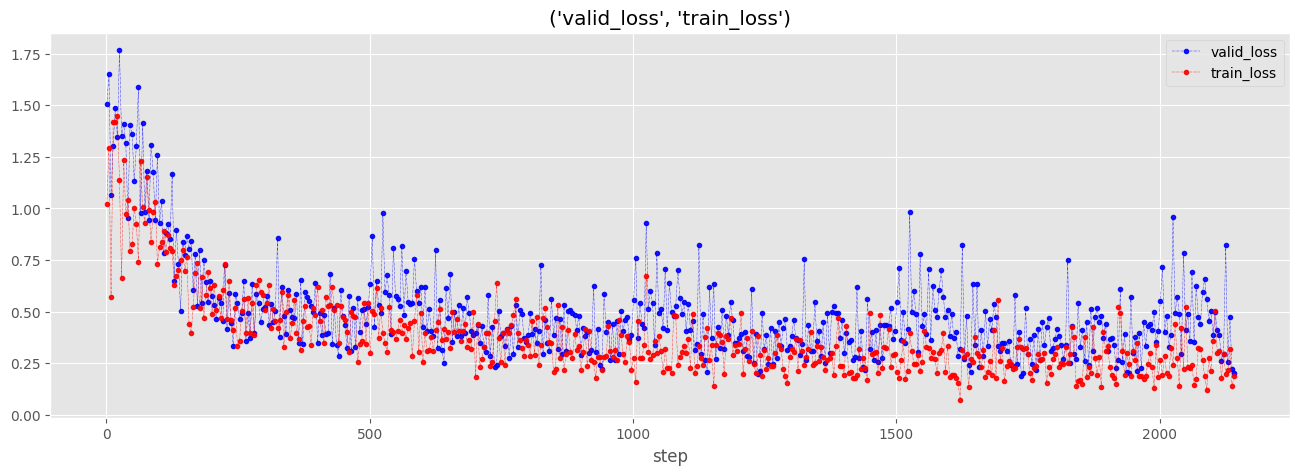

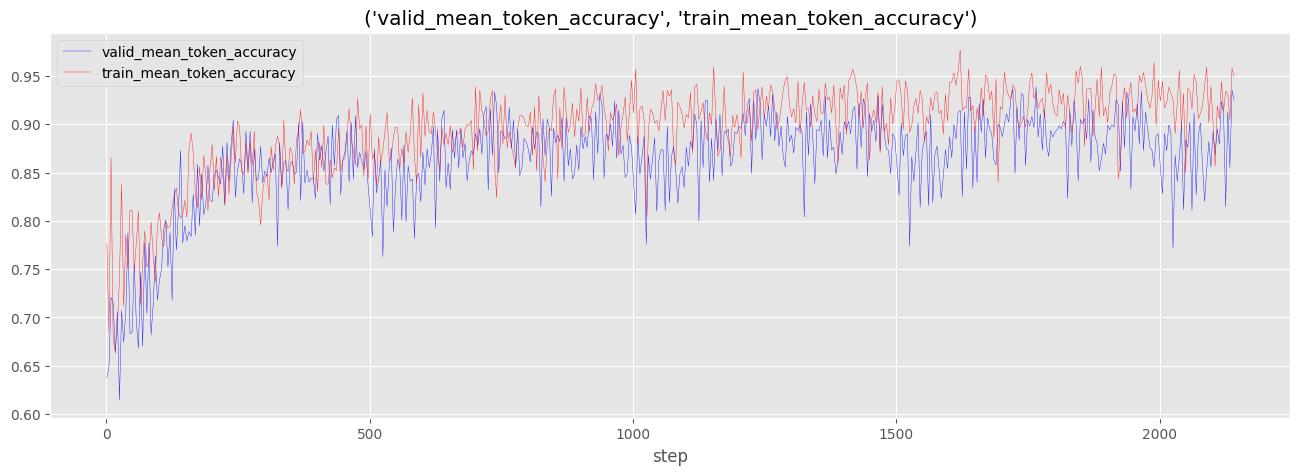

In [429]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (16,5) 

cx='index'
cx='step'

#col='train_loss'
#loss[loss[col].notnull()].reset_index().plot(x=cx,y=col, logy=False, linewidth=0.1, style='*-',  alpha=0.9,  color='red',title=f"{col}" )

col='valid_loss'
col2='train_loss'
#cx='step'
ax = loss[loss[col].notnull()].reset_index().plot(x=cx,y=[col,col2], logy=False, linewidth=0.3, style='.-.',  alpha=0.9,  color=['blue','red'],title=f"{col,col2}" )
#loss_ref[loss_ref[col].notnull()].reset_index().plot(ax=ax,x=cx,y=[col,col2], logy=False, linewidth=0.3, style='.-',  alpha=0.9,  color=['green','magenta'],title=f"{col,col2}" )

col='train_loss'
col='valid_loss'
#ax = loss[loss[col].notnull()].reset_index().plot(x=cx,y=[col], logy=False, linewidth=0.1, style='.-',  alpha=0.9,  color=['blue'],title=f"{col}" )
#loss_ref[loss_ref[col].notnull()].reset_index().plot(ax=ax,x=cx,y=[col], logy=False, linewidth=0.1, style='.-',  alpha=0.9,  color=['green'],title=f"{col}" )
#ax.legend(["1epochs with lr-mult=5","1epochs"])

#col='valid_mean_token_accuracy'
#cx='step'
#loss[loss[col].notnull()].reset_index().plot(x=cx,y=col, logy=False, linewidth=0.1, style='o-',  alpha=0.9,  color='green',title=f"{col}" )

col='valid_mean_token_accuracy'
col2='train_mean_token_accuracy'
#cx='step'
loss[loss[col].notnull()].reset_index().plot(x=cx,y=[col,col2], logy=False, linewidth=0.3, style='-',  alpha=0.9,  color=['blue','red'],title=f"{col,col2}" )

In [391]:
import json
import datetime
job_id='ftjob-fa9124e5d5fa4872a3daf9cd83c37223' # ok "fine_tuned_model": "gpt-35-turbo-0613.ft-fa9124e5d5fa4872a3daf9cd83c37223-text-to-signal",
#job_id='ftjob-388de829f101442188bba4f21f9625be' # problematic
#job_id='ftjob-48d12d2c0ac34086af58e5248f64c10b' # 10 epochs
job_id="ftjob-7f7b40e45aa6410990acae466da60958" # 1 epoch
job_id='ftjob-62a8ed1bf7594913a7041372c73227ef' # 1 epoch lr*5 batch_size=4 
response = client.fine_tuning.jobs.retrieve(job_id)
print(response.status)
print(response.model_dump_json(indent=2))
created_at= json.loads(response.model_dump_json(indent=2)) ['created_at']
updated_at= json.loads(response.model_dump_json(indent=2)) ['updated_at']
finished_at= json.loads(response.model_dump_json(indent=2)) ['finished_at']
delta = updated_at- created_at
delta = finished_at - created_at
#datetime.datetime.fromtimestamp(created_at)
print(f"Started at {datetime.datetime.fromtimestamp(created_at)}")
print(f"Updated at {datetime.datetime.fromtimestamp(updated_at)}")
print(f'Training duration: {str(datetime.timedelta(seconds=delta))}') 
#print(f"Finished   {datetime.datetime.fromtimestamp(finished_at)}")

succeeded
{
  "id": "ftjob-62a8ed1bf7594913a7041372c73227ef",
  "created_at": 1707908350,
  "error": null,
  "fine_tuned_model": "gpt-35-turbo-0613.ft-62a8ed1bf7594913a7041372c73227ef-text-to-signal",
  "finished_at": 1707973997,
  "hyperparameters": {
    "n_epochs": 1,
    "batch_size": 4,
    "learning_rate_multiplier": 5
  },
  "model": "gpt-35-turbo-0613",
  "object": "fine_tuning.job",
  "organization_id": null,
  "result_files": [
    "file-441e7735941b4e4093ea02aeeab18b14"
  ],
  "status": "succeeded",
  "trained_tokens": 1460258,
  "training_file": "file-5b99575dca7143bd91d4bd345df8d798",
  "validation_file": "file-3a7ef624ad33430b8686d094fe5cf4d4",
  "suffix": "text-to-signal",
  "updated_at": 1707973997
}
Started at 2024-02-14 11:59:10
Updated at 2024-02-15 06:13:17
Training duration: 18:14:07


In [149]:
"""js
UsageDate	PublisherType	ChargeType	ServiceName	ServiceTier	Meter	PartNumber	CostUSD	Cost	Currency
2024-02-08	Azure	Usage	Cognitive Services	OpenAI	GPT-35-turbo-4k-Completion Tokens	AAN-83431	0.00	0.00	USD
2024-02-08	Azure	Usage	Cognitive Services	OpenAI	GPT-35-turbo-4k-Prompt Tokens	AAN-83432	0.00	0.00	USD
2024-02-08	Azure	Usage	Cognitive Services	OpenAI	GPT35-Turbo-4K-FineTuned Deployment Hosting Unit	AAP-29601	42.28	42.28	USD
2024-02-08	Azure	Usage	Cognitive Services	OpenAI	GPT35-Turbo-4K-FineTuned Training Unit	AAP-29598	69.75	69.75	USD
2024-02-09	Azure	Usage	Cognitive Services	OpenAI	GPT35-Turbo-4K-FineTuned Deployment Hosting Unit	AAP-29601	23.44	23.44	USD
"""

'js\nUsageDate\tPublisherType\tChargeType\tServiceName\tServiceTier\tMeter\tPartNumber\tCostUSD\tCost\tCurrency\n2024-02-08\tAzure\tUsage\tCognitive Services\tOpenAI\tGPT-35-turbo-4k-Completion Tokens\tAAN-83431\t0.00\t0.00\tUSD\n2024-02-08\tAzure\tUsage\tCognitive Services\tOpenAI\tGPT-35-turbo-4k-Prompt Tokens\tAAN-83432\t0.00\t0.00\tUSD\n2024-02-08\tAzure\tUsage\tCognitive Services\tOpenAI\tGPT35-Turbo-4K-FineTuned Deployment Hosting Unit\tAAP-29601\t42.28\t42.28\tUSD\n2024-02-08\tAzure\tUsage\tCognitive Services\tOpenAI\tGPT35-Turbo-4K-FineTuned Training Unit\tAAP-29598\t69.75\t69.75\tUSD\n2024-02-09\tAzure\tUsage\tCognitive Services\tOpenAI\tGPT35-Turbo-4K-FineTuned Deployment Hosting Unit\tAAP-29601\t23.44\t23.44\tUSD\n'

In [393]:
# Training cost
# https://platform.openai.com/docs/guides/fine-tuning/estimate-costs 
# base cost per 1k tokens * number of tokens in the input file * number of epochs trained
# gpt-3.5-turbo	$0.0080 / 1K tokens
Nepoch=1
pr = 0.0080 /1024
trained_tokens= json.loads(response.model_dump_json(indent=2))["trained_tokens"]
price_dollars= trained_tokens * pr #* Nepoch
print(f'Training price {price_dollars}$ for {Nepoch} epochs and {int(trained_tokens/1024)}k tokens' )

Training price 11.408265625$ for 1 epochs and 1426k tokens


In [392]:
# Duration of training
import datetime
created_at= json.loads(response.model_dump_json(indent=2)) ['created_at']
finished_at= json.loads(response.model_dump_json(indent=2)) ['finished_at']
delta = finished_at- created_at
datetime.datetime.fromtimestamp(created_at)
print(f'Training duration: {str(datetime.timedelta(seconds=delta))}') 


Training duration: 18:14:07


In [48]:
! pip show openai

Name: openai
Version: 1.11.1
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /Users/d071932/PycharmProjects/text2SIGNAL/.venv/lib/python3.11/site-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 


# IV. Inference with FT-gpt-3.5-turbo

Input ORG:
```py
{"filename": "f5213b3ab3", 
"split": "test", 
"name": "Events by User Type and frequency of occurence", 
"query": "SELECT DISTINCT  event_name,\"Event Created by User Type\",count(event_name) AS A\nFROM FLATTEN (\"defaultview-59\")\nORDER BY 3  desc\nlimit 10", 
"llm_name": "signal_description_llama2-70b-chat-hf", 
"description_llm": "Retrieve distinct event names, count of event names, and sort them in descending order based on the count of event names, and limit the result to 10 rows from the 'defaultview-59' table."}
```

Input OpenAI:
```py
[{'role': 'system',
   'content': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."},
  {'role': 'user',
   'content': "Retrieve the sum of the 'TSR_HoursApproved' column from the 'defaultview-197' table."},
  {'role': 'assistant',
   'content': '\nSELECT\nSUM("TSR_HoursApproved")\nFROM "defaultview-197"\n                '}],
```

Output example
```js
[
    {
        "filename": "f5213b3ab3",
        "split": "test",
        "name": "Events by User Type and frequency of occurence",
        "query": "SELECT DISTINCT  event_name,\"Event Created by User Type\",count(event_name) AS A\nFROM FLATTEN (\"defaultview-59\")\nORDER BY 3  desc\nlimit 10",
        "llm_name": "signal_description_llama2-70b-chat-hf",
        "description_llm": "Retrieve distinct event names, count of event names, and sort them in descending order based on the count of event names, and limit the result to 10 rows from the 'defaultview-59' table.",
        "llm_codellama_full_output": "\n   [INST]\n  You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \n  SIGNAL stands for Signavio Analytics Language. \n  SIGNAL is a dialect of SQL.\n  Your goal is to help users craft SIGNAL \n  queries and understand the SIGNAL language better. \n  \n  \n  ### Instruction:\n  \n  Task to solve:\n  \n  Construct SIGNAL expression querying given textual description in Input.\n  Expected output results are in JSON format.\n  \n  \n  ### Input:\n  Retrieve distinct event names, count of event names, and sort them in descending order based on the count of event names, and limit the result to 10 rows from the 'defaultview-59' table.\n  \n  ### Output:\n  [/INST]\n{ \"query\":\"\"\"SELECT DISTINCT event_name AS \"Event Name\", COUNT(event_name)\nFROM FLATTEN(\"defaultview-59\")\nORDER BY 2 DESC\nLIMIT 10\"\"\"}",
        "llm_codellama_query": "\"\"\"SELECT DISTINCT event_name AS \"Event Name\", COUNT(event_name)\nFROM FLATTEN(\"defaultview-59\")\nORDER BY 2 DESC\nLIMIT 10\"\"\""
    },
```

In [47]:
import json


file_path="text2signal_test_1000_openai.jsonl"
dataset_test = []
with open(file_path) as f:
    for line in f:
        dataset_test.append(json.loads(line))

file_path="text2signal_test_1000.jsonl"
dataset_test_org = []
with open(file_path) as f:
    for line in f:
        dataset_test_org.append(json.loads(line))
    

dataset_test[10]["messages"][0:3] , dataset_test[10]["messages"][2]['content'], dataset_test_org[10] #["messages"][0:3]

([{'role': 'system',
   'content': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."},
  {'role': 'user',
   'content': "Retrieve the sum of the 'TSR_HoursApproved' column from the 'defaultview-197' table."},
  {'role': 'assistant',
   'content': '\nSELECT\nSUM("TSR_HoursApproved")\nFROM "defaultview-197"\n                '}],
 '\nSELECT\nSUM("TSR_HoursApproved")\nFROM "defaultview-197"\n                ',
 {'filename': 'e21acbeec8',
  'split': 'test',
  'name': '_Total approved hours',
  'query': '\nSELECT\nSUM("TSR_HoursApproved")\nFROM "defaultview-197"\n                ',
  'llm_name': 'signal_description_llama2-70b-chat-hf',
  'description_llm': "Retrieve the sum of the 'TSR_HoursApproved' column from the 'defaultview-197' table."})

In [360]:
# Sanity check if jsonl have the same order

from tqdm import tqdm

for a,b in tqdm(zip(dataset_test, dataset_test_org)):
    if a["messages"][2]['content'] != b["query"]:
        print(a["messages"][2]['content'] , b["query"])

1000it [00:00, 32830.07it/s]


In [361]:
# Inference call  Chat models
# New Client

azure_endpoint=os.getenv("AZURE_OPENAI_FT_ENDPOINT")
api_key="d9c6245af9a84ab0947049863a6a31a4" # os.getenv("AZURE_OPENAI_API_FT_KEY")
model="test-gpt-35"
model="gpt-35-turbo-0613-text2signal" # 5 epoch
model="gpt-35-turbo-0613-text2signal-10epochs" # 10 epochs
model="gpt-35-turbo-0613-text2signal-1epoch-lrm-5" # 1 epoch lr*5 
client = AzureOpenAI(
  azure_endpoint = azure_endpoint, 
  api_key=api_key,  
  api_version="2023-12-01-preview"  # This API version or later is required to access fine-tuning for turbo/babbage-002/davinci-002
)

In [362]:
for q in dataset_test[0:2]:
    print(q["messages"][0:2])

[{'role': 'system', 'content': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."}, {'role': 'user', 'content': "Retrieve distinct event names, count of event names, and sort them in descending order based on the count of event names, and limit the result to 10 rows from the 'defaultview-59' table."}]
[{'role': 'system', 'content': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better."}, {'role': 'user', 'content': "For each CASE_ID in the 'defaultview-124' table, count the number of events that match the specified pattern and divide it by the number of events that match the pattern 'Clear Invoi

In [363]:
# Chat Inference fro 1000 takes 7 mins
#messages=a["messages"]
#n=999
#messages, answer =dataset_test[n]["messages"][0:2], dataset_test[n]["messages"][2]['content']

#for a,b in tqdm(zip(dataset_test, dataset_test_org)):
#    if a["messages"][2]['content'] != b["query"]:
#        print(a["messages"][2]['content'] , b["query"]) 

model="gpt-35-turbo-0613-text2signal"
model="gpt-35-turbo-0613-text2signal-10epochs" # 10 epochs
model="gpt-35-turbo-0613-text2signal-1epoch"
model="gpt-35-turbo-0613-text2signal-1epoch-lrm-5" # 1 epoch lr*5 

results=[]
for q in tqdm(dataset_test):
    #print(q["messages"][0:2])

    try:
        completion = client.chat.completions.create(
                        model=model,  # e.g. gpt-35-instant
                     messages=q["messages"][0:2]
                    )
        res_query = json.loads(completion.model_dump_json(indent=2))["choices"][0]["message"]["content"]
    except openai.APIConnectionError as e:
        print("Server connection error: {e.__cause__}")  # from httpx.
        raise
    except openai.RateLimitError as e:
        print(f"OpenAI RATE LIMIT error {e.status_code}: (e.response)")
        raise
    except openai.APIStatusError as e:
        print(f"OpenAI STATUS error {e.status_code}: (e.response)")
        raise
    except openai.BadRequestError as e:
        print(f"OpenAI BAD REQUEST error {e.status_code}: (e.response)")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise
    res=json.loads(completion.model_dump_json(indent=2))["usage"]
    res[f"llm_{model}_query"]=res_query
    results.append(res)
    #print(res)
    
#print(completion.model_dump_json(indent=2)["choices"], answer)
#print(json.loads(completion.model_dump_json(indent=2))["choices"][0]["message"]["content"], "\n : GT \n" , answer)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [14:52<00:00,  1.12it/s] 


In [386]:
#json.loads(completion.model_dump_json(indent=2))["usage"]
results[0:3]

[{'completion_tokens': 32,
  'prompt_tokens': 106,
  'total_tokens': 138,
  'llm_gpt-35-turbo-0613-text2signal-1epoch-lrm-5_query': 'SELECT\nDISTINCT EVENT_NAME\n,COUNT (EVENT_NAME)\nFROM FLATTEN ("defaultview-59")\nORDER BY 2 desc\nLIMIT 10'},
 {'completion_tokens': 254,
  'prompt_tokens': 164,
  'total_tokens': 418,
  'llm_gpt-35-turbo-0613-text2signal-1epoch-lrm-5_query': 'SELECT\n  COUNT (CASE_ID) FILTER (\n    WHERE\n      BEHAVIOUR (\n        EVENT_NAME IN (\'Create PO Item\')\n        AND (\n          FIRST (END_TIME) FILTER (\n            WHERE\n              EVENT_NAME IN (\'Release PO\')\n          ) > LAST (END_TIME) FILTER (\n            WHERE\n              EVENT_NAME IN (\'Create PO Item\')\n          )\n        )\n        AND (CASE_ID NOT IN (SELECT CASE_ID FROM fl_3))\n        AND (CASE_ID IN (SELECT CASE_ID FROM defaultview-124))\n        AND (CASE_ID IN (SELECT CASE_ID FROM defaultview-124))\n      ) AS bool\n  )/ COUNT (CASE_ID) FILTER (\n    WHERE\n      BEHAVIOUR (

In [387]:
import copy
dataset_test_out =copy.deepcopy(dataset_test_org)
completion_tokens=0
prompt_tokens=0
total_tokens=0
fld_in="llm_gpt-35-turbo-0613-text2signal-1epoch-lrm-5_query"
fld_in=f"llm_{model}_query"
for a,b in tqdm(zip(results, dataset_test_out)):
    completion_tokens+=a['completion_tokens']
    prompt_tokens+=a['prompt_tokens']
    total_tokens+=a['total_tokens']
    #print(a,a['completion_tokens'])
    b['llm_gpt-35-turbo-0613_query']       = a[fld_in]
    b['llm_gpt-35-turbo-0613_full_output'] = a[fld_in]
    #print(a['llm_gpt-35-turbo-0613-text2signal_query'],b)
    
#    if a["messages"][2]['content'] != b["query"]:
#        print(a["messages"][2]['content'] , b["query"])
print(f"Total evaluation cost {total_tokens / 1024 *0.006} $")

1000it [00:00, 374224.13it/s]

Total evaluation cost 1.25286328125 $


In [388]:
## Save JSONL in openAI format
import json 
file_path=f"signals_{model}_test_set_1000_epoch_1_lrm_5.json"

with open(file_path, 'w') as outfile:
    json.dump(dataset_test_out, outfile,indent=4)

In [389]:
file_path

'signals_gpt-35-turbo-0613-text2signal-1epoch-lrm-5_test_set_1000_epoch_1_lrm_5.json'

In [390]:
dataset_test_out[1]

{'filename': 'bac85808e2',
 'split': 'test',
 'name': 'Conformance Level',
 'query': 'SELECT \n\tCOUNT (CASE_ID) FILTER (WHERE EVENT_NAME MATCHES (\n    \t\'Create PO Item\'\n\t\t~> \'Release PO\'\n\t\t~> \'Create Goods Receipt\'\n\t\t~> (\'Record Invoice Receipt\'|\'Create FI Invoice\')\n\t\t~> \'Clear Invoice\')) \n\t/ COUNT (CASE_ID) FILTER (WHERE EVENT_NAME MATCHES (\'Clear Invoice\')) \n    * 100 AS "Conformance Rate"\n\nFROM "defaultview-124" ',
 'llm_name': 'signal_description_llama2-70b-chat-hf',
 'description_llm': "For each CASE_ID in the 'defaultview-124' table, count the number of events that match the specified pattern and divide it by the number of events that match the pattern 'Clear Invoice'. The pattern is a sequence of events starting with 'Create PO Item', followed by 'Release PO', then 'Create Goods Receipt', then either 'Record Invoice Receipt' or 'Create FI Invoice', and finally 'Clear Invoice'. The result is then multiplied by 100 to express it as a percentage.",

# Inference Completion models

In [526]:
import json


file_path="text2signal_test_1000_openai_completion.jsonl"
dataset_test = []
with open(file_path) as f:
    for line in f:
        dataset_test.append(json.loads(line))
        
file_path="text2signal_test_1000.jsonl"
dataset_org = []
with open(file_path) as f:
    for line in f:
        dataset_org.append(json.loads(line))


In [527]:
dataset_test[3], "\n" ,dataset_org[10]#['filename']

({'prompt': "You are SIGNAL assistant, a part of SAP Signavio's Process Intelligence Suite. \nSIGNAL stands for Signavio Analytics Language. \nSIGNAL is a dialect of SQL.\nYour goal is to help users craft SIGNAL queries and understand the SIGNAL language better.\n\n  ### Instruction:\n  \n  Task to solve:\n  \n  Construct SIGNAL expression querying given textual description in Input.\n  Expected output results are in JSON format.\n\n   ### Input:\n\n   Retrieve the number of unique events with the name containing 'Invoice' and ChangeType = 'Update', grouped by SalesDocCustomerCompany, sorted in descending order by the number of changes, limited to 10 rows. \n\n   ### Output:\n  ",
  'completion': '{ "query":"""SELECT\n  COUNT (DISTINCT "UniqueEventId") FILTER (\n    WHERE\n      BEHAVIOUR (\n        EVENT_NAME LIKE \'%Invoice%\'\n        AND ChangeType = \'Update\'\n      ) AS changes MATCHES (changes)\n  ) AS "# Changes",\n  "SalesDocCustomerCompany"\nFROM\n  FLATTEN("defaultview-383"

In [434]:
client = AzureOpenAI(
  azure_endpoint = azure_endpoint, 
  api_key=api_key,  
  api_version="2023-12-01-preview"  # This API version or later is required to access fine-tuning for turbo/babbage-002/davinci-002
)

In [548]:
# Completion Inference fro 1000 takes 7 mins


model="davinci-002-3epochs"

results=[]
for q in tqdm(dataset_test): #[0:10]):
    #print(q["messages"][0:2])

    try:
        prompt=q['prompt']
        completion =  client.completions.create (
                        model=model,  # e.g. gpt-35-instant
                     prompt=prompt,
                     stop=['"""}'],
                     max_tokens=1024,
                     temperature=0
                    )
        res_query = json.loads(completion.model_dump_json(indent=2))["choices"][0]["text"]
        gt_query=q['completion']
    except openai.APIConnectionError as e:
        print("Server connection error: {e.__cause__}")  # from httpx.
        raise
    except openai.RateLimitError as e:
        print(f"OpenAI RATE LIMIT error {e.status_code}: (e.response)")
        raise
    except openai.APIStatusError as e:
        print(f"OpenAI STATUS error {e.status_code}: (e.response)")
        raise
    except openai.BadRequestError as e:
        print(f"OpenAI BAD REQUEST error {e.status_code}: (e.response)")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise
    res =json.loads(completion.model_dump_json(indent=2))["usage"]
    res_q = json.loads(completion.model_dump_json(indent=2))
    finish_reason = res_q['choices'][0]['finish_reason']
    query_q=res_q['choices'][0]['text'] +' """}'
    #print(query_q)
    try:
        #processed = '"""'.join(query_q.split('"""', 2)[:2]) + '"""}'
        #q_out=eval(processed.encode())["query"]
        q_out=eval(query_q)["query"]
    except Exception as e:
        print(e,"\n>>>>>>>>>>>>>>>Problem to process", query_q)
        q_out=f"Error {e}"
        
        
    res[f"llm_{model}_query"]=q_out
    results.append(res)
    #print(res)
    
#print(completion.model_dump_json(indent=2)["choices"], answer)
#print(json.loads(completion.model_dump_json(indent=2))["choices"][0]["message"]["content"], "\n : GT \n" , answer)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:24<00:00,  2.48s/it]


In [550]:
#"Error " in  results[5]['llm_davinci-002-3epochs_query']['query']
results[0:3]

[{'completion_tokens': 47,
  'prompt_tokens': 137,
  'total_tokens': 184,
  'llm_davinci-002-3epochs_query': 'SELECT \nDISTINCT\nEVENT_NAME AS "Event Name", \nCOUNT (EVENT_NAME) AS "Event Count"\nFROM FLATTEN("defaultview-59")\nORDER BY 2 DESC\nLIMIT 10 '},
 {'completion_tokens': 115,
  'prompt_tokens': 195,
  'total_tokens': 310,
  'llm_davinci-002-3epochs_query': 'SELECT\n  COUNT (CASE_ID) FILTER (\n    WHERE\n      EVENT_NAME MATCHES(\n        \'Create PO Item\'\n        ~>Release PO<~>\n        "Create Goods Receipt"\n        ~>Record Invoice Receipt|Create FI Invoice ~>Clear Invoice"~>\n      ))\n  /\n  COUNT (CASE_ID) FILTER (\n    WHERE\n      EVENT_NAME MATCHES(\n        \'Clear Invoice\'\n        ~>Record Invoice Receipt|Create FI Invoice ~>Clear Invoice"~>\n      ))\n  * 100\nFROM\n  "defaultview-124" '},
 {'completion_tokens': 1024,
  'prompt_tokens': 146,
  'total_tokens': 1170,
  'llm_davinci-002-3epochs_query': 'SELECT COUNT (DISTINCT "Last Invoice Id"  ) FILTER (\n\tWHER

In [528]:
#### import copy
#### results_copy =copy.deepcopy(results)
#### corrected_results=[]
#### for r in results:
####     #a = r['llm_davinci-002-3epochs_query'] #['query']
####     if  isinstance(r['llm_davinci-002-3epochs_query'], dict):
####         r['llm_davinci-002-3epochs_query'] = r['llm_davinci-002-3epochs_query']['query']
####     corrected_results.append(r)
####     print(r)
####     #b=f"{a['query']}"
####     #if "Error "  in b : 
####     #    print(b)

{'completion_tokens': 47, 'prompt_tokens': 137, 'total_tokens': 184, 'llm_davinci-002-3epochs_query': 'SELECT \nDISTINCT\nEVENT_NAME AS "Event Name", \nCOUNT (EVENT_NAME) AS "Event Count"\nFROM FLATTEN("defaultview-59")\nORDER BY 2 DESC\nLIMIT 10 '}
{'completion_tokens': 115, 'prompt_tokens': 195, 'total_tokens': 310, 'llm_davinci-002-3epochs_query': 'SELECT\n  COUNT (CASE_ID) FILTER (\n    WHERE\n      EVENT_NAME MATCHES(\n        \'Create PO Item\'\n        ~>Release PO<~>\n        "Create Goods Receipt"\n        ~>Record Invoice Receipt|Create FI Invoice ~>Clear Invoice"~>\n      ))\n  /\n  COUNT (CASE_ID) FILTER (\n    WHERE\n      EVENT_NAME MATCHES(\n        \'Clear Invoice\'\n        ~>Record Invoice Receipt|Create FI Invoice ~>Clear Invoice"~>\n      ))\n  * 100\nFROM\n  "defaultview-124" '}
{'completion_tokens': 1024, 'prompt_tokens': 146, 'total_tokens': 1170, 'llm_davinci-002-3epochs_query': 'SELECT COUNT (DISTINCT "Last Invoice Id"  ) FILTER (\n\tWHERE "PO Item Type" = \'Ca

In [551]:
# davinci-002 Output to be sent to Signavio API
# {'filename': 'd9c60165f1',
# 'split': 'test',
# 'name': 'PO Rejection Rate on Catalog Items',
# 'query': 'SELECT count(distinct "Last Invoice Id" ) \nFILTER (WHERE "PO Confirmation Status"  = \'Rejected\'\nAND "PO Item Line Type" = \'Catalog\')/\ncount(distinct "Last Invoice Id" ) * 100\nFROM "defaultview-431"',
# 'llm_name': 'signal_description_llama2-70b-chat-hf',
# 'description_llm': "Get the percentage of rejected PO items that are catalog items. Filter the results by 'Last Invoice Id' and calculate the percentage by dividing the count of distinct 'Last Invoice Id' for rejected PO items by the total count of distinct 'Last Invoice Id'.",
# 'llm_davinci-002_query': 'SELECT COUNT (DISTINCT "Last Invoice Id"  ) FILTER (\n\tWHERE "PO Item Type" = \'Catalog Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n ',
# 'llm_davinci-002_full_output': 'SELECT COUNT (DISTINCT "Last Invoice Id"  ) FILTER (\n\tWHERE "PO Item Type" = \'Catalog Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n        AND "PO Item Type" = \'PO Item\'\n '}

 
import copy
dataset_test_out =copy.deepcopy(dataset_org)
#results=copy.deepcopy(corrected_results)
completion_tokens=0
prompt_tokens=0
total_tokens=0
fld_in="llm_davinci-002-3epochs_query" #"llm_davinci-002-3epochs_query"
#fld_in=f"llm_{model}_query"
for a,b in tqdm(zip(results, dataset_test_out)):
    completion_tokens+=a['completion_tokens']
    prompt_tokens+=a['prompt_tokens']
    total_tokens+=a['total_tokens']
    #print(a,a['completion_tokens'])
    b['llm_davinci-002_query']       = a[fld_in]
    b['llm_davinci-002_full_output'] = a[fld_in]

print(f"Total evaluation cost {total_tokens / 1024 *0.006} $")
dataset_test_out[2]

10it [00:00, 39235.77it/s]

Total evaluation cost 0.018826171875 $


{'filename': 'd9c60165f1',
 'split': 'test',
 'name': 'PO Rejection Rate on Catalog Items',
 'query': 'SELECT count(distinct "Last Invoice Id" ) \nFILTER (WHERE "PO Confirmation Status"  = \'Rejected\'\nAND "PO Item Line Type" = \'Catalog\')/\ncount(distinct "Last Invoice Id" ) * 100\nFROM "defaultview-431"',
 'llm_name': 'signal_description_llama2-70b-chat-hf',
 'description_llm': "Get the percentage of rejected PO items that are catalog items. Filter the results by 'Last Invoice Id' and calculate the percentage by dividing the count of distinct 'Last Invoice Id' for rejected PO items by the total count of distinct 'Last Invoice Id'.",
 'llm_davinci-002_query': 'SELECT COUNT (DISTINCT "Last Invoice Id"  ) FILTER (\n\tWHERE "PO Item Type" = \'Catalog Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item Type" = \'PO Item\'\n\tAND "PO Item 

In [547]:
import json 
file_path=f"signals_{model}_test_set_1000_epoch_3.json"
with open(file_path, 'w') as outfile:
    json.dump(dataset_test_out, outfile,indent=4)
file_path

'signals_davinci-002-3epochs_test_set_1000_epoch_3.json'